In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df_original = dataset['train'].to_pandas()

# Data Cleansing
df_original['job_posted_date'] = pd.to_datetime(df_original['job_posted_date'])
df_original['job_skills'] = df_original['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df_altered = df_original.copy()

In [4]:
df_altered_explode = df_altered.explode('job_skills')

<Axes: xlabel='job_skills'>

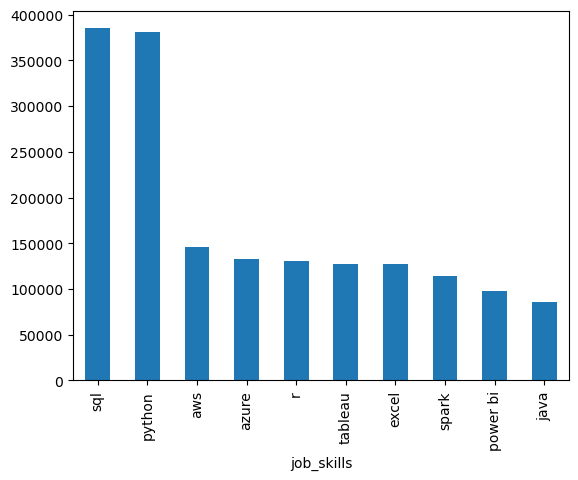

In [12]:
df_altered_explode['job_skills'].value_counts().head(10).plot(kind='bar')

In [15]:
skills_count = df_altered_explode.groupby(['job_skills', 'job_title_short']).size() #creates series

In [1]:
df_skills_count = skills_count.reset_index(name='skill_count') #makes from series to dataFrame
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

NameError: name 'skills_count' is not defined

In [38]:
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


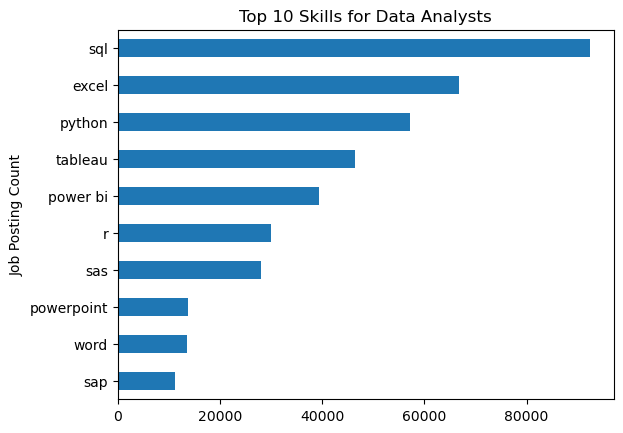

In [50]:
job_title = 'Data Analyst'
top_skills = 10
df_skill_final = df_skills_count[df_skills_count['job_title_short']==job_title].head(top_skills)
df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()
plt.ylabel('')
plt.ylabel('Job Posting Count')
plt.legend().set_visible(False)
plt.title(f'Top {top_skills} Skills for {job_title}s')
plt.show()